In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/timedata/GBPCAD PRINT EMA HIGH 50.txt
/kaggle/input/timedata/GBPCAD PRINT SMA CLOSE 21.txt
/kaggle/input/timedata/GBPCAD BB LOW 20 SD1.txt
/kaggle/input/timedata/GBPCAD BB HIGH 20 SD3.txt
/kaggle/input/timedata/GBPCAD PRINT SMA CLOSE 100.txt
/kaggle/input/timedata/GBPCAD PRINT SMA CLOSE  9.txt
/kaggle/input/timedata/GBPCAD BB HIGH 50 SD1.txt
/kaggle/input/timedata/VIX PRINT HLOC HDLD.txt
/kaggle/input/timedata/GBPCAD BB CLOSE 50.txt
/kaggle/input/timedata/GBPCAD BB OPEN 50 SD3.txt
/kaggle/input/timedata/GBPCAD PRINT SMA HIGH 200.txt
/kaggle/input/timedata/GBPCAD BB CLOSE 20 SD3.txt
/kaggle/input/timedata/GBPCAD BB OPEN 20 SD 1.txt
/kaggle/input/timedata/GBPCAD BB LOW 50 SD3.txt
/kaggle/input/timedata/GBPCAD PRINT SMA LOW 50.txt
/kaggle/input/timedata/GBPCAD PRINT EMA CLOSE 200.txt
/kaggle/input/timedata/GBPCAD PRINT EMA HIGH 100.txt
/kaggle/input/timedata/GBPCAD PRINT EMA LOW 50.txt
/kaggle/input/timedata/GBPCAD PRINT EMA OPEN 50.txt
/kaggle/input/timedata/GBPCAD PRINT EM

# reading VIX HD LD data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
import csv

def read_and_split_lines(filename):
    with open(filename, "r") as f:
        lines = f.read().splitlines()

    # Create a list to store the data
    data = []

    # Iterate through the lines and split each line into a list of words
    for line in lines:
        words = line.split()

        # Add the data to the list
        data.append(words)

    # Save the data to a CSV file
    with open("data.csv", "w") as csvfile:
        writer = csv.writer(csvfile, delimiter=",")
        writer.writerows(data)

if __name__ == "__main__":
    filename = "/kaggle/input/timedata/VIX PRINT HLOC HDLD.txt"
    read_and_split_lines(filename)

In [5]:
df=pd.read_csv('/kaggle/working/data.csv', names=["date",'2', "high",'3',"low",'4','open','5','close','6','highD','7','lowD','8','time','9'])
df

,date,2,high,3,low,4,open,5,close,6,highD,7,lowD,8,time,9
0,date__04/03/2015,high,1.86378,low,1.86218,open,1.86348,close,1.86265,highD,1.86378,lowD,1.86218,time,200.0,NaN
1,date__04/03/2015,high,1.86367,low,1.86193,open,1.86268,close,1.86303,highD,1.86378,lowD,1.86193,time,300.0,NaN
2,date__04/03/2015,high,1.86332,low,1.86210,open,1.86304,close,1.86263,highD,1.86378,lowD,1.86193,time,400.0,NaN
3,date__04/03/2015,high,1.86336,low,1.86218,open,1.86262,close,1.86269,highD,1.86378,lowD,1.86193,time,500.0,NaN
4,date__04/03/2015,high,1.86303,low,1.86172,open,1.86271,close,1.86185,highD,1.86378,lowD,1.86172,time,600.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74967,date__04/28/2023,high,16.43000,low,15.93000,open,16.41000,close,16.06000,highD,17.65000,lowD,15.93000,time,1815.0,NaN
74968,date__04/28/2023,high,16.16000,low,16.03000,open,16.06000,close,16.08000,highD,17.65000,lowD,15.93000,time,1915.0,NaN
74969,date__04/28/2023,high,16.23000,low,16.05000,open,16.08000,close,16.13000,highD,17.65000,lowD,15.93000,time,2015.0,NaN
74970,date__04/28/2023,high,16.34000,low,16.02000,open,16.14000,close,16.04000,highD,17.65000,lowD,15.93000,time,2115.0,NaN


In [6]:
from datetime import datetime

# Extract the date and time as a single datetime object from each date column
for col in df.columns:
    if col.startswith('date__'):
        # Extract the date and time from the column
        datetime_strings = df[col].str.split('date__').str[1]
        dates = datetime_strings.str.split(' ').str[0]
        times = datetime_strings.str.split(' ').str[1]
        
        # Combine the date and time into a single datetime object
        df[col + '_datetime'] = dates + ' ' + times
        df[col + '_datetime'] = pd.to_datetime(df[col + '_datetime'], format='%m/%d/%Y %H:%M:%S')

# Print the modified DataFrame with the extracted datetime objects
df

,date,2,high,3,low,4,open,5,close,6,highD,7,lowD,8,time,9
0,date__04/03/2015,high,1.86378,low,1.86218,open,1.86348,close,1.86265,highD,1.86378,lowD,1.86218,time,200.0,NaN
1,date__04/03/2015,high,1.86367,low,1.86193,open,1.86268,close,1.86303,highD,1.86378,lowD,1.86193,time,300.0,NaN
2,date__04/03/2015,high,1.86332,low,1.86210,open,1.86304,close,1.86263,highD,1.86378,lowD,1.86193,time,400.0,NaN
3,date__04/03/2015,high,1.86336,low,1.86218,open,1.86262,close,1.86269,highD,1.86378,lowD,1.86193,time,500.0,NaN
4,date__04/03/2015,high,1.86303,low,1.86172,open,1.86271,close,1.86185,highD,1.86378,lowD,1.86172,time,600.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74967,date__04/28/2023,high,16.43000,low,15.93000,open,16.41000,close,16.06000,highD,17.65000,lowD,15.93000,time,1815.0,NaN
74968,date__04/28/2023,high,16.16000,low,16.03000,open,16.06000,close,16.08000,highD,17.65000,lowD,15.93000,time,1915.0,NaN
74969,date__04/28/2023,high,16.23000,low,16.05000,open,16.08000,close,16.13000,highD,17.65000,lowD,15.93000,time,2015.0,NaN
74970,date__04/28/2023,high,16.34000,low,16.02000,open,16.14000,close,16.04000,highD,17.65000,lowD,15.93000,time,2115.0,NaN


# droping unnecessary columns

In [7]:
df.drop(['2','3','4','5','6','7','8','9'],axis=1,inplace=True)

In [39]:
df.tail(30)

,open,close,highD,lowD,time_hour
date,,,,,
2023-04-26,17.90,18.43,19.61,17.87,19
2023-04-26,18.43,19.04,19.61,17.87,20
2023-04-26,19.02,19.17,19.61,17.87,21
2023-04-26,19.16,18.84,19.61,17.87,22
2023-04-27,18.43,18.33,18.43,18.20,10
2023-04-27,18.33,18.22,18.43,18.18,11
2023-04-27,18.22,18.26,18.43,18.17,12
2023-04-27,18.26,18.08,18.43,18.00,13
2023-04-27,18.08,17.95,18.43,17.93,14


In [40]:
df.shape

(74972, 5)

# extracting date from the date column and removing any thing else

In [8]:
# Importing the parser module from the dateutil library
from dateutil import parser  

# Looping through each date string in the 'date' column of the DataFrame
for date_string in df['date']:
    res = parser.parse(date_string, fuzzy=True)  # Parsing the date string using the parser module
    
# Applying the parser to each element in the 'date' column of the DataFrame
df['date'] = df['date'].apply(lambda x: parser.parse(x, fuzzy=True)) 

In [9]:
df

,date,high,low,open,close,highD,lowD,time
0,2015-04-03,1.86378,1.86218,1.86348,1.86265,1.86378,1.86218,200.0
1,2015-04-03,1.86367,1.86193,1.86268,1.86303,1.86378,1.86193,300.0
2,2015-04-03,1.86332,1.86210,1.86304,1.86263,1.86378,1.86193,400.0
3,2015-04-03,1.86336,1.86218,1.86262,1.86269,1.86378,1.86193,500.0
4,2015-04-03,1.86303,1.86172,1.86271,1.86185,1.86378,1.86172,600.0
...,...,...,...,...,...,...,...,...
74967,2023-04-28,16.43000,15.93000,16.41000,16.06000,17.65000,15.93000,1815.0
74968,2023-04-28,16.16000,16.03000,16.06000,16.08000,17.65000,15.93000,1915.0
74969,2023-04-28,16.23000,16.05000,16.08000,16.13000,17.65000,15.93000,2015.0
74970,2023-04-28,16.34000,16.02000,16.14000,16.04000,17.65000,15.93000,2115.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74972 entries, 2015-04-03 to 2023-04-28
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       74972 non-null  float64
 1   close      74972 non-null  float64
 2   highD      74972 non-null  float64
 3   lowD       74972 non-null  float64
 4   time_hour  74972 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 3.4 MB


# converting date and time columns to datetime types

In [10]:
# Convert the time column to datetime objects
df['time'] = pd.to_datetime(df['time'].astype(int).astype(str).str.zfill(4), format='%H%M')

# Create a new column with the formatted time values
df['time'] = df['time'].dt.strftime('%H:%M')
df['date']=pd.to_datetime(df['date'])
# Print the resulting DataFrame
df

,date,high,low,open,close,highD,lowD,time
0,2015-04-03,1.86378,1.86218,1.86348,1.86265,1.86378,1.86218,02:00
1,2015-04-03,1.86367,1.86193,1.86268,1.86303,1.86378,1.86193,03:00
2,2015-04-03,1.86332,1.86210,1.86304,1.86263,1.86378,1.86193,04:00
3,2015-04-03,1.86336,1.86218,1.86262,1.86269,1.86378,1.86193,05:00
4,2015-04-03,1.86303,1.86172,1.86271,1.86185,1.86378,1.86172,06:00
...,...,...,...,...,...,...,...,...
74967,2023-04-28,16.43000,15.93000,16.41000,16.06000,17.65000,15.93000,18:15
74968,2023-04-28,16.16000,16.03000,16.06000,16.08000,17.65000,15.93000,19:15
74969,2023-04-28,16.23000,16.05000,16.08000,16.13000,17.65000,15.93000,20:15
74970,2023-04-28,16.34000,16.02000,16.14000,16.04000,17.65000,15.93000,21:15


In [ ]:
df.info()

# extracting hour from time feature and adding it as a new feature in the data

In [11]:
df['time']=pd.to_datetime(df['time'])
df['time_hour']=df['time'].dt.hour
df.drop(['high','low','time'],axis=1,inplace=True)

In [12]:
df

,date,open,close,highD,lowD,time_hour
0,2015-04-03,1.86348,1.86265,1.86378,1.86218,2
1,2015-04-03,1.86268,1.86303,1.86378,1.86193,3
2,2015-04-03,1.86304,1.86263,1.86378,1.86193,4
3,2015-04-03,1.86262,1.86269,1.86378,1.86193,5
4,2015-04-03,1.86271,1.86185,1.86378,1.86172,6
...,...,...,...,...,...,...
74967,2023-04-28,16.41000,16.06000,17.65000,15.93000,18
74968,2023-04-28,16.06000,16.08000,17.65000,15.93000,19
74969,2023-04-28,16.08000,16.13000,17.65000,15.93000,20
74970,2023-04-28,16.14000,16.04000,17.65000,15.93000,21


# set the date column as the index

In [13]:
df.set_index('date',inplace=True)

In [48]:
df.tail(37)

,open,close,highD,lowD,time_hour
date,,,,,
2023-04-26,18.66,18.85,19.15,18.59,12
2023-04-26,18.85,19.51,19.61,18.59,13
2023-04-26,19.58,18.99,19.61,18.59,14
2023-04-26,19.00,18.66,19.61,18.59,15
2023-04-26,18.65,18.94,19.61,18.59,16
2023-04-26,18.97,18.28,19.61,18.21,17
2023-04-26,18.28,17.89,19.61,17.87,18
2023-04-26,17.90,18.43,19.61,17.87,19
2023-04-26,18.43,19.04,19.61,17.87,20


In [49]:
df.isna().sum()

open         0
close        0
highD        0
lowD         0
time_hour    0
dtype: int64

# data visualizing for open & close & lowD & highD features

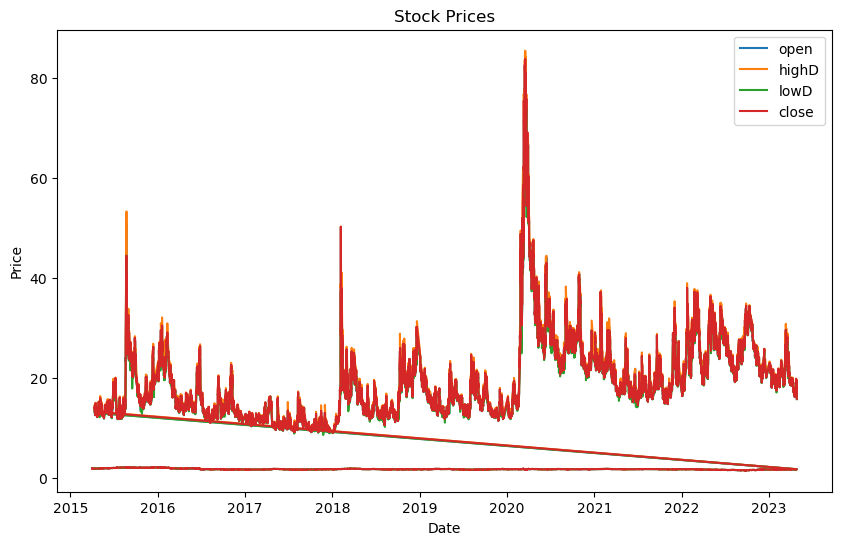

In [50]:
# plot the open, high, low, and close prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['open'], label='open')
plt.plot(df.index, df['highD'], label='highD')
plt.plot(df.index, df['lowD'], label='lowD')
plt.plot(df.index, df['close'], label='close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend()
plt.show()

In [81]:
import plotly.graph_objs as go
# create candlestick trace
trace = go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['highD'],
    low=df['lowD'],
    close=df['close']
)

# create figure object and add trace
fig = go.Figure(data=[trace])

# update layout of figure
fig.update_layout(
    title='Stock Prices',
    xaxis_title='Date',
    yaxis_title='Price'
)
import plotly.io as pio
pio.renderers.default = 'iframe'
# display interactive plot
fig.show()

In [82]:
# import plotly graph objects
import plotly.graph_objects as go
# use go.OHLC function and pass the date, open,
# high, low and close price of the function
fig = go.Figure(data=go.Ohlc(x=df.index,
                             open=df['open'],
                             high=df['highD'],
                             low=df['lowD'],
                             close=df['close']))

import plotly.io as pio
pio.renderers.default = 'iframe'
# show the figure
fig.show()

In [14]:
high_low=df.drop(['time_hour'],axis=1)
high_low

,open,close,highD,lowD
date,,,,
2015-04-03,1.86348,1.86265,1.86378,1.86218
2015-04-03,1.86268,1.86303,1.86378,1.86193
2015-04-03,1.86304,1.86263,1.86378,1.86193
2015-04-03,1.86262,1.86269,1.86378,1.86193
2015-04-03,1.86271,1.86185,1.86378,1.86172
...,...,...,...,...
2023-04-28,16.41000,16.06000,17.65000,15.93000
2023-04-28,16.06000,16.08000,17.65000,15.93000
2023-04-28,16.08000,16.13000,17.65000,15.93000


In [21]:
df.reset_index()

,date,open,close,highD,lowD,time_hour
0,2015-04-03,1.86348,1.86265,1.86378,1.86218,2
1,2015-04-03,1.86268,1.86303,1.86378,1.86193,3
2,2015-04-03,1.86304,1.86263,1.86378,1.86193,4
3,2015-04-03,1.86262,1.86269,1.86378,1.86193,5
4,2015-04-03,1.86271,1.86185,1.86378,1.86172,6
...,...,...,...,...,...,...
74967,2023-04-28,16.41000,16.06000,17.65000,15.93000,18
74968,2023-04-28,16.06000,16.08000,17.65000,15.93000,19
74969,2023-04-28,16.08000,16.13000,17.65000,15.93000,20
74970,2023-04-28,16.14000,16.04000,17.65000,15.93000,21


In [26]:
high_low=df.drop('time_hour',axis=1)

# extracting minimum values for highD and lowD for every day in the dataset.

In [27]:
# Group by date and find maximum values of highD and lowD columns
high_low = high_low.groupby(high_low.index.date).agg({'highD': 'min', 'lowD': 'min', 'open': 'min', 'close': 'min'})

# Display the resulting DataFrame
high_low

,highD,lowD,open,close
2015-04-03,1.86378,1.85348,1.85500,1.85508
2015-04-06,1.86294,1.85348,1.85776,1.85732
2015-04-07,1.85796,1.85182,1.85238,1.85197
2015-04-08,1.85314,1.85095,1.85122,1.85125
2015-04-09,1.86591,1.85050,1.85114,1.85072
...,...,...,...,...
2023-04-24,1.68532,1.67346,1.68300,1.68300
2023-04-25,1.69122,1.68252,1.68807,1.68806
2023-04-26,1.69135,1.68689,1.69070,1.69070
2023-04-27,1.70282,1.68966,1.69586,1.69580


# visualizing highD and lowD in lineplot

In [28]:
import plotly.graph_objects as go
# create line chart
fig = go.Figure(data=[go.Scatter(x=high_low.index, y=high_low['highD'], name='HighD'),
                      go.Scatter(x=high_low.index, y=high_low['lowD'], name='LowD')])

# set title and axis labels
fig.update_layout(title='Maximum HighD and LowD Values by Date',
                   xaxis_title='Date',
                   yaxis_title='Price')

# show plot
fig.show()

# smoothing the data by average for every year for highD and lowD

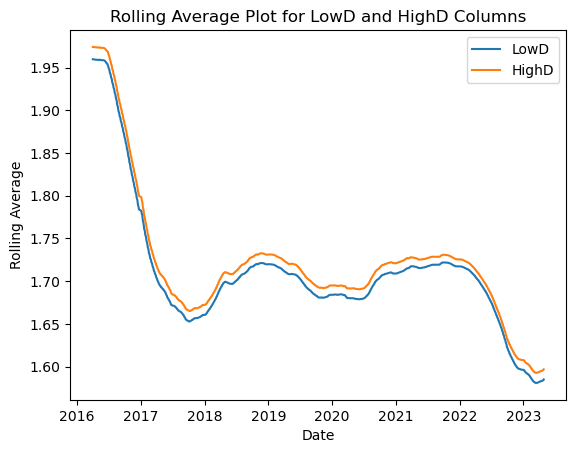

In [29]:
# Calculate the rolling averages for the "lowD" and "highD" columns
rolling_lowD = high_low['lowD'].rolling(window=252).mean()
rolling_highD = high_low['highD'].rolling(window=252).mean()

# Plot the rolling averages for both columns
plt.plot(rolling_lowD, label='LowD')
plt.plot(rolling_highD, label='HighD')

# Add axis labels and a title
plt.xlabel('Date')
plt.ylabel('Rolling Average')
plt.title('Rolling Average Plot for LowD and HighD Columns')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# ploting ACF and PACF to see the stationarity and auto correlation for lowD and highD features

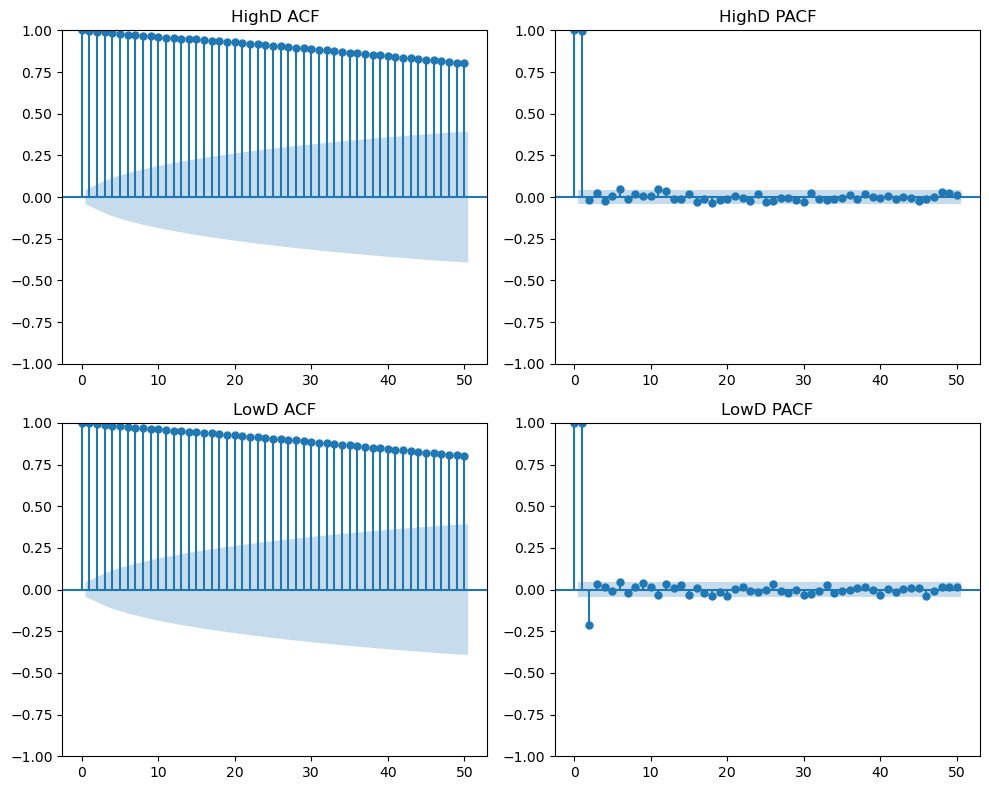

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot ACF and PACF for highD column
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
plot_acf(high_low['highD'], ax=ax[0, 0], lags=50)
plot_pacf(high_low['highD'], ax=ax[0, 1], lags=50)
ax[0, 0].set_title('HighD ACF')
ax[0, 1].set_title('HighD PACF')

# plot ACF and PACF for lowD column
plot_acf(high_low['lowD'], ax=ax[1, 0], lags=50)
plot_pacf(high_low['lowD'], ax=ax[1, 1], lags=50)
ax[1, 0].set_title('LowD ACF')
ax[1, 1].set_title('LowD PACF')

plt.tight_layout()
plt.show()

# the ACF is geometrically declining with lags and PACF is statistically significant for 0 lags so AR=0 for highD and for lowD is statistically significant for 1 lags so AR=1 for highD features.

# calculating p-value for highD and lowD features by dickey fuller test 

In [31]:
# Importing required libraries
from statsmodels.tsa.stattools import adfuller

# Performing Dickey-Fuller test on 'highD' column of 'high_low' dataframe
dftest = adfuller(high_low['highD'], autolag='AIC')

# Creating a series to store the test results
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags used', 'Number of observations used'])

# Looping through the critical values and adding them to the series
for key, value in dftest[4].items():
    dfoutput['Critical value(%s)' % key] = value

# Printing the test results
print('Results of Dickey Fuller Test:')
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -2.147414
p-value                           0.225881
Lags used                         0.000000
Number of observations used    2031.000000
Critical value(1%)               -3.433574
Critical value(5%)               -2.862964
Critical value(10%)              -2.567528
dtype: float64


In [32]:
print('Results of Dickey Fuller Test:')

# Performing Dickey-Fuller test on 'lowD' column of 'high_low' dataframe
dftest=adfuller(high_low['lowD'],autolag='AIC')

# Creating a series to store the test results
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags used','Number of observations used'])

# Looping through the critical values and adding them to the series
for key,value in dftest[4].items():
    dfoutput['Critical value(%s)'%key]=value

# Printing the test results
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -2.184244
p-value                           0.212014
Lags used                         2.000000
Number of observations used    2029.000000
Critical value(1%)               -3.433577
Critical value(5%)               -2.862966
Critical value(10%)              -2.567529
dtype: float64


In [33]:
# perform ADF test on highD and lowD columns
results_highD = adfuller(high_low['highD'])
results_lowD = adfuller(high_low['lowD'])

# extract p-values from ADF test results
p_value_highD = results_highD[1]
p_value_lowD = results_lowD[1]

# print p-values and conclusion about stationarity
print('HighD p-value: ', p_value_highD)
if p_value_highD < 0.05:
    print('The HighD column is stationary.')
else:
    print('The HighD column is non-stationary.')

print('LowD p-value: ', p_value_lowD)
if p_value_lowD < 0.05:
    print('The LowD column is stationary.')
else:
    print('The LowD column is non-stationary.')

HighD p-value:  0.22588130396318545
The HighD column is non-stationary.
LowD p-value:  0.21201362603197932
The LowD column is non-stationary.


# The p-value for highD columns is bigger than .05 so the columns is non stationarity and p-value for lowD columns is bigger than .05 so the columns is non stationarity.  

In [63]:
high_low.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2032 entries, 2015-04-03 to 2023-04-28
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (highD, min)  2032 non-null   float64
 1   (open, min)   2032 non-null   float64
 2   (close, min)  2032 non-null   float64
 3   (lowD, min)   2032 non-null   float64
dtypes: float64(4)
memory usage: 79.4 KB


# predicting highD and lowD columns

# splitting the data to train and test

In [41]:
high_low.reset_index(names='date')

,date,highD,lowD,open,close
0,2015-04-03,1.86378,1.85348,1.85500,1.85508
1,2015-04-06,1.86294,1.85348,1.85776,1.85732
2,2015-04-07,1.85796,1.85182,1.85238,1.85197
3,2015-04-08,1.85314,1.85095,1.85122,1.85125
4,2015-04-09,1.86591,1.85050,1.85114,1.85072
...,...,...,...,...,...
2027,2023-04-24,1.68532,1.67346,1.68300,1.68300
2028,2023-04-25,1.69122,1.68252,1.68807,1.68806
2029,2023-04-26,1.69135,1.68689,1.69070,1.69070
2030,2023-04-27,1.70282,1.68966,1.69586,1.69580


In [42]:
high_low

,highD,lowD,open,close
2015-04-03,1.86378,1.85348,1.85500,1.85508
2015-04-06,1.86294,1.85348,1.85776,1.85732
2015-04-07,1.85796,1.85182,1.85238,1.85197
2015-04-08,1.85314,1.85095,1.85122,1.85125
2015-04-09,1.86591,1.85050,1.85114,1.85072
...,...,...,...,...
2023-04-24,1.68532,1.67346,1.68300,1.68300
2023-04-25,1.69122,1.68252,1.68807,1.68806
2023-04-26,1.69135,1.68689,1.69070,1.69070
2023-04-27,1.70282,1.68966,1.69586,1.69580


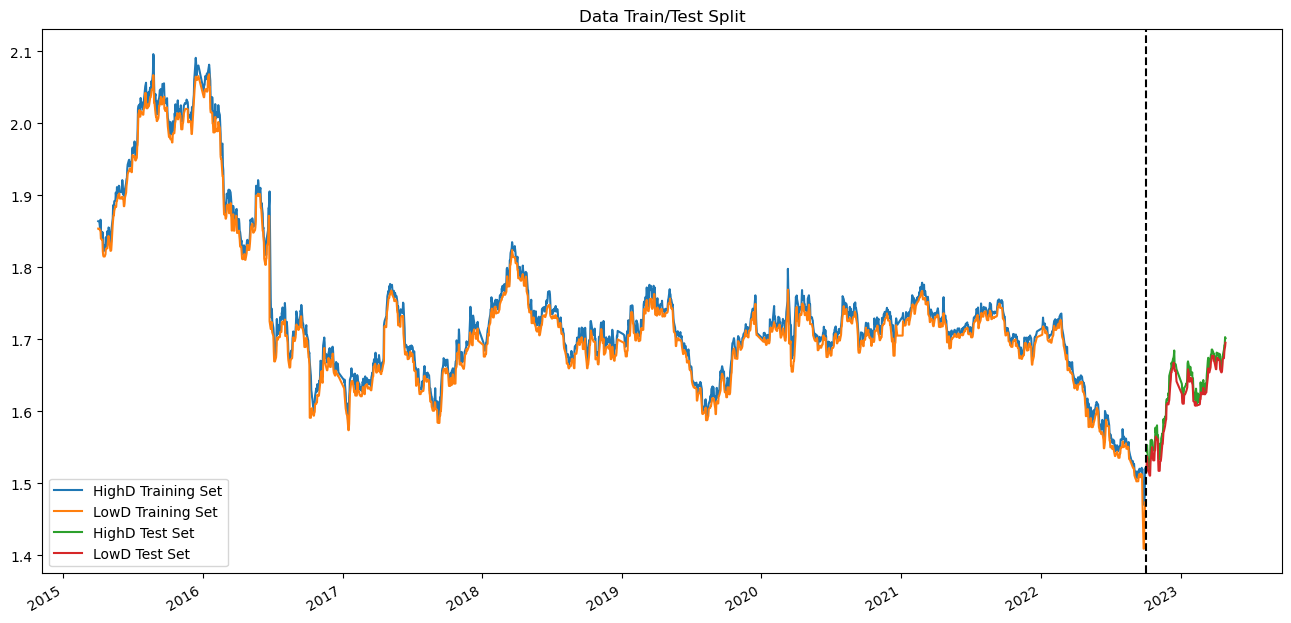

In [47]:
# Convert index to datetime format
high_low.index = pd.to_datetime(high_low.index)

train_high = high_low.loc[high_low.index < '10-01-2022', 'highD']
test_high = high_low.loc[high_low.index >= '10-01-2022', 'highD']

train_low = high_low.loc[high_low.index < '10-01-2022', 'lowD']
test_low = high_low.loc[high_low.index >= '10-01-2022', 'lowD']

fig, ax = plt.subplots(figsize=(16, 8))
train_high.plot(ax=ax, label='HighD Training Set', title='Data Train/Test Split')
train_low.plot(ax=ax, label='LowD Training Set')
test_high.plot(ax=ax, label='HighD Test Set')
test_low.plot(ax=ax, label='LowD Test Set')
ax.axvline('10-01-2022', color='black', ls='--')
ax.legend(['HighD Training Set', 'LowD Training Set', 'HighD Test Set', 'LowD Test Set'])

plt.show()

# make prediction model for highD and lowD features in one model by xgboost and multioutput rgressor

In [48]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error
# Combine the features
features = ['open', 'close']
x_train = high_low.loc[high_low.index < '10-01-2022', features]
x_test = high_low.loc[high_low.index >= '10-01-2022', features]

# Create the target variable
y_train = pd.concat([train_high, train_low], axis=1)
y_test = pd.concat([test_high, test_low], axis=1)

# Initialize the XGBRegressor model
xgb_model = xgb.XGBRegressor()

# Wrap the model with MultiOutputRegressor
model = MultiOutputRegressor(xgb_model)

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.004811854463304791


# merging actual and predicted highD and lowD in one data

In [49]:
# Convert the predicted values to a DataFrame with timestamps
pred_df = pd.DataFrame(y_pred, index=x_test.index, columns=['pred_highD', 'pred_lowD'])

# Merge the predicted values with the actual test data
merged_df = pd.concat([test_high, test_low, pred_df], axis=1)

# Print the merged DataFrame
merged_df

,highD,lowD,pred_highD,pred_lowD
2022-10-03,1.54416,1.51509,1.532060,1.527172
2022-10-04,1.54510,1.52702,1.545669,1.537577
2022-10-05,1.55282,1.53673,1.545669,1.537577
2022-10-06,1.54274,1.52648,1.533614,1.528264
2022-10-07,1.53547,1.51908,1.526788,1.519985
...,...,...,...,...
2023-04-24,1.68532,1.67346,1.688750,1.678059
2023-04-25,1.69122,1.68252,1.702929,1.686388
2023-04-26,1.69135,1.68689,1.696956,1.687952
2023-04-27,1.70282,1.68966,1.702583,1.692806


# visualizing actual and predicted lowD and highD values to see the model accuracy

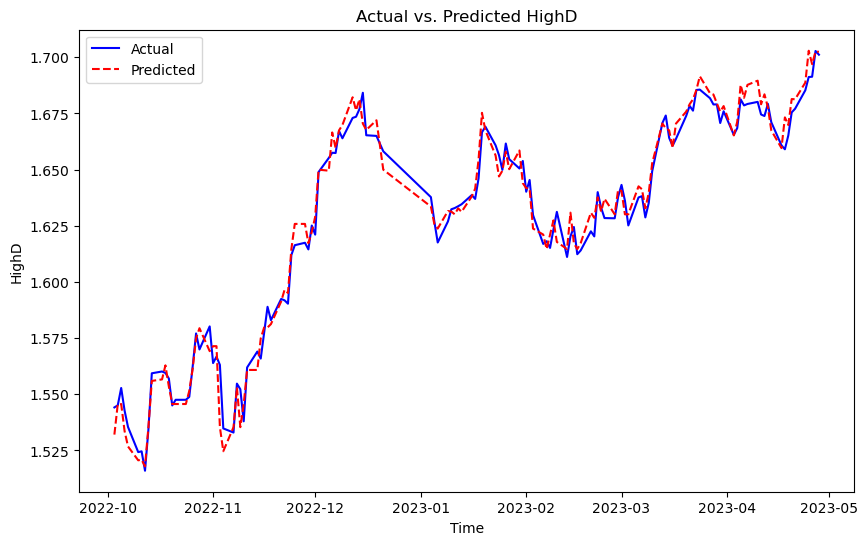

In [50]:
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual highD values
ax.plot(merged_df['highD'], label='Actual',color='blue')

# Plot the predicted highD values
ax.plot(merged_df['pred_highD'], label='Predicted',ls='--',color='red')

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('HighD')
ax.set_title('Actual vs. Predicted HighD')

# Add a legend
ax.legend()

# Show the plot
plt.show()

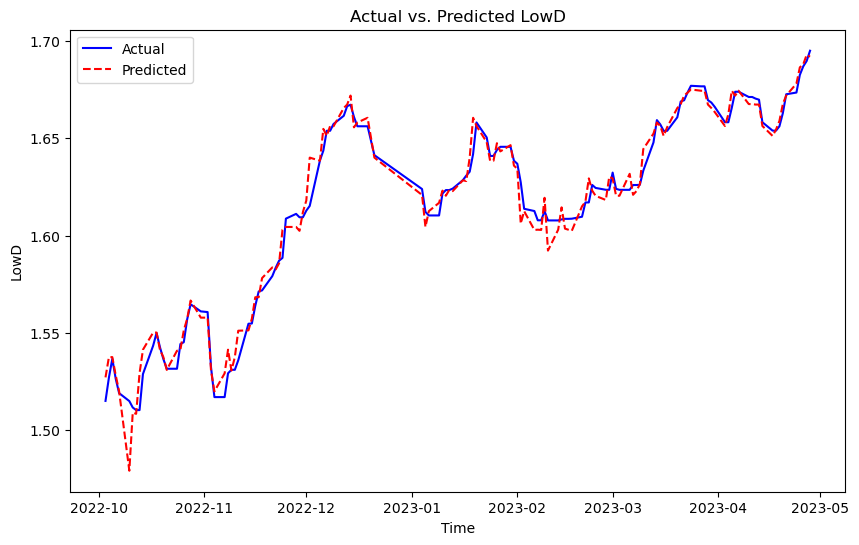

In [51]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual lowD values
ax.plot(merged_df['lowD'], label='Actual',color='blue')

# Plot the predicted lowD values
ax.plot(merged_df['pred_lowD'], label='Predicted',ls='--',color='red')

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('LowD')
ax.set_title('Actual vs. Predicted LowD')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [52]:
merged_df['highD_diff']=abs(merged_df['highD']-merged_df['pred_highD'])
merged_df['lowD_diff']=abs(merged_df['lowD']-merged_df['pred_lowD'])
merged_df

,highD,lowD,pred_highD,pred_lowD,highD_diff,lowD_diff
2022-10-03,1.54416,1.51509,1.532060,1.527172,0.012100,0.012082
2022-10-04,1.54510,1.52702,1.545669,1.537577,0.000569,0.010557
2022-10-05,1.55282,1.53673,1.545669,1.537577,0.007151,0.000847
2022-10-06,1.54274,1.52648,1.533614,1.528264,0.009126,0.001784
2022-10-07,1.53547,1.51908,1.526788,1.519985,0.008682,0.000905
...,...,...,...,...,...,...
2023-04-24,1.68532,1.67346,1.688750,1.678059,0.003430,0.004599
2023-04-25,1.69122,1.68252,1.702929,1.686388,0.011709,0.003868
2023-04-26,1.69135,1.68689,1.696956,1.687952,0.005606,0.001062
2023-04-27,1.70282,1.68966,1.702583,1.692806,0.000237,0.003146


In [53]:
print('MAX difference for highD is :' ,merged_df['highD_diff'].max())
print()
print('MIN difference for highD is :' ,merged_df['highD_diff'].min())
print()
print('MEAN difference for highD is :' ,merged_df['highD_diff'].mean())

MAX difference for highD is : 0.027715848999023462

MIN difference for highD is : 2.2501983642619905e-05

MEAN difference for highD is : 0.004952778094972875


In [54]:
print('MAX difference for lowD is :' ,merged_df['lowD_diff'].max())
print()
print('MIN difference for lowD is :' ,merged_df['lowD_diff'].min())
print()
print('MEAN difference for lowD is :' ,merged_df['lowD_diff'].mean())

MAX difference for lowD is : 0.035754946937561094

MIN difference for lowD is : 7.147132873530637e-05

MEAN difference for lowD is : 0.004670930831636708


# make prediction model for highD and lowD features in one model by random forest regressor and multioutput rgressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the XGBRegressor model
RFR_model = RandomForestRegressor(n_estimators=300,max_depth=7,min_samples_split=2)

# Wrap the model with MultiOutputRegressor
model1 = MultiOutputRegressor(RFR_model)

# Fit the model on the training data
model1.fit(x_train, y_train)

# Make predictions on the test data
y_predict = model1.predict(x_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_predict)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.004711026136084466


# comparing between actual and predicted values in table

In [56]:
# Convert the predicted values to a DataFrame with timestamps
predict_df = pd.DataFrame(y_predict, index=x_test.index, columns=['pred_highD', 'pred_lowD'])

# Merge the predicted values with the actual test data
merging_df = pd.concat([test_high, test_low, pred_df], axis=1)

# Print the merged DataFrame
merging_df

,highD,lowD,pred_highD,pred_lowD
2022-10-03,1.54416,1.51509,1.532060,1.527172
2022-10-04,1.54510,1.52702,1.545669,1.537577
2022-10-05,1.55282,1.53673,1.545669,1.537577
2022-10-06,1.54274,1.52648,1.533614,1.528264
2022-10-07,1.53547,1.51908,1.526788,1.519985
...,...,...,...,...
2023-04-24,1.68532,1.67346,1.688750,1.678059
2023-04-25,1.69122,1.68252,1.702929,1.686388
2023-04-26,1.69135,1.68689,1.696956,1.687952
2023-04-27,1.70282,1.68966,1.702583,1.692806


# visualize the actual and predicted values to see the accuracy

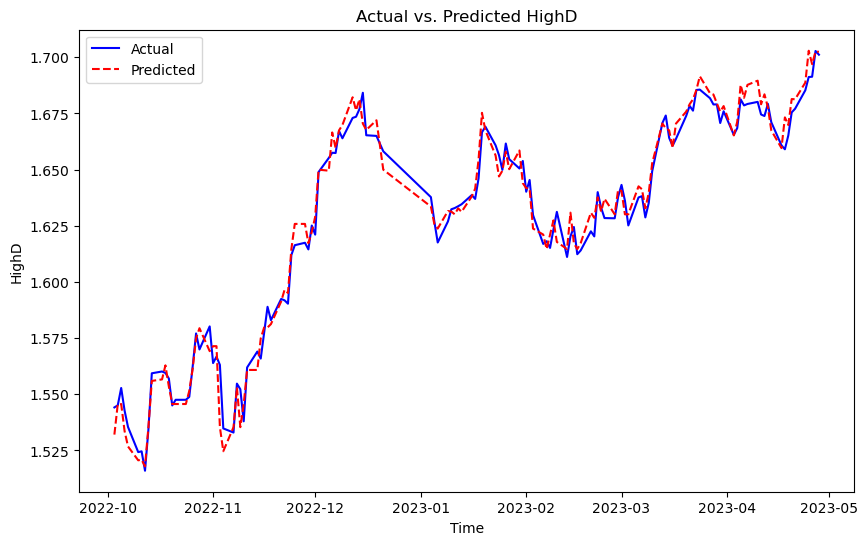

In [57]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual highD values
ax.plot(merging_df['highD'], label='Actual',color='blue')

# Plot the predicted highD values
ax.plot(merging_df['pred_highD'], label='Predicted',ls='--',color='red')

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('HighD')
ax.set_title('Actual vs. Predicted HighD')

# Add a legend
ax.legend()

# Show the plot
plt.show()

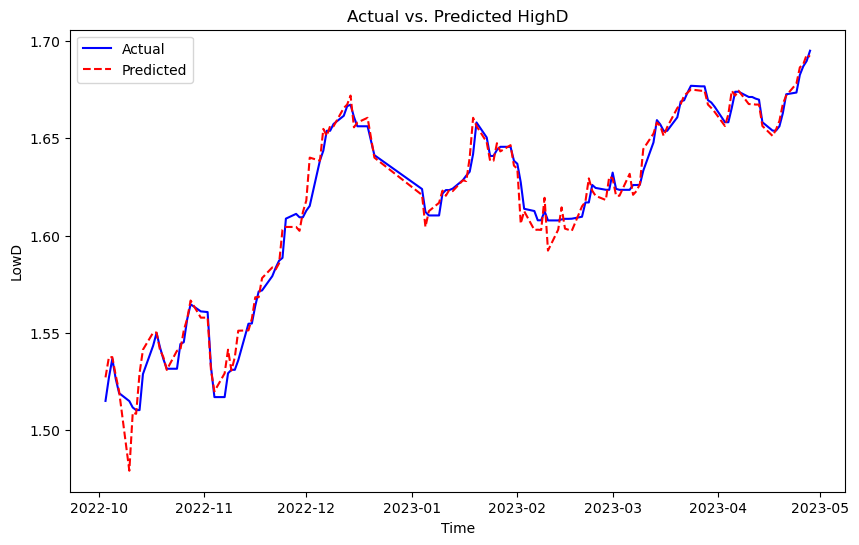

In [58]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual lowD values
ax.plot(merging_df['lowD'], label='Actual',color='blue')

# Plot the predicted lowD values
ax.plot(merging_df['pred_lowD'], label='Predicted',ls='--',color='red')

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('LowD')
ax.set_title('Actual vs. Predicted HighD')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [59]:
merging_df['highD_diff']=abs(merging_df['highD']-merging_df['pred_highD'])
merging_df['lowD_diff']=abs(merging_df['lowD']-merging_df['pred_lowD'])

In [60]:
print('MAX difference for highD is :' ,merging_df['highD_diff'].max())
print()
print('MIN difference for highD is :' ,merging_df['highD_diff'].min())
print()
print('MEAN difference for highD is :' ,merging_df['highD_diff'].mean())

MAX difference for highD is : 0.027715848999023462

MIN difference for highD is : 2.2501983642619905e-05

MEAN difference for highD is : 0.004952778094972875


In [61]:
print('MAX difference for lowD is :' ,merging_df['lowD_diff'].max())
print()
print('MIN difference for lowD is :' ,merging_df['lowD_diff'].min())
print()
print('MEAN difference for lowD is :' ,merging_df['lowD_diff'].mean())

MAX difference for lowD is : 0.035754946937561094

MIN difference for lowD is : 7.147132873530637e-05

MEAN difference for lowD is : 0.004670930831636708


In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
# Combine the features
features = ['open', 'close']
x_train = high_low.loc[high_low.index < '10-01-2022', features]
x_test = high_low.loc[high_low.index >= '10-01-2022', features]

# Create the target variable
y_train = pd.concat([train_high, train_low], axis=1)
y_test = pd.concat([test_high, test_low], axis=1)

# Scale the features and target variables
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

# Reshape the data for LSTM input
x_train_reshaped = x_train_scaled.reshape(x_train_scaled.shape[0], 1, x_train_scaled.shape[1])
x_test_reshaped = x_test_scaled.reshape(x_test_scaled.shape[0], 1, x_test_scaled.shape[1])

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(1, len(features))))
model.add(Dropout(.2))
model.add(Dense(2))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(x_train_reshaped, y_train_scaled, validation_data=(x_test_reshaped, y_test_scaled), epochs=30, batch_size=32, verbose=1)

# Make predictions on the test data
y_pred_scaled = model.predict(x_test_reshaped)

# Rescale the predictions
y_pred = scaler.inverse_transform(y_pred_scaled)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Epoch 1/30
60/60 [==============================] - 3s 12ms/step - loss: 0.3496 - accuracy: 0.0090 - val_loss: 0.1008 - val_accuracy: 0.0000e+00
Epoch 2/30
60/60 [==============================] - 0s 3ms/step - loss: 0.1170 - accuracy: 0.3763 - val_loss: 0.0890 - val_accuracy: 1.0000
Epoch 3/30
60/60 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.8562 - val_loss: 0.0750 - val_accuracy: 1.0000
Epoch 4/30
60/60 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.8610 - val_loss: 0.0544 - val_accuracy: 1.0000
Epoch 5/30
60/60 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.8288 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 6/30
60/60 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.8510 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 7/30
60/60 [==============================] - 0s 4ms/step - loss: 0.0412 - accuracy: 0.8658 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 8/30
60/6

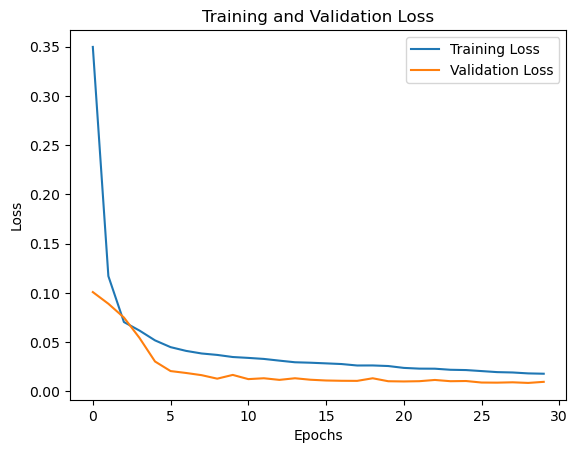

In [76]:
# Access the loss and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

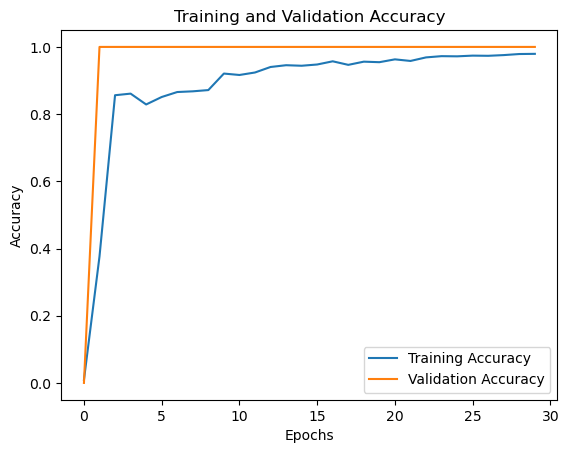

In [77]:
# Access the accuracy and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the accuracy and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [78]:
# Convert the predicted values to a DataFrame with timestamps
pred_df = pd.DataFrame(y_pred, index=x_test.index, columns=['pred_highD', 'pred_lowD'])

# Merge the predicted values with the actual test data
merged_df = pd.concat([test_high, test_low, pred_df], axis=1)

# Print the merged DataFrame
merged_df

,highD,lowD,pred_highD,pred_lowD
2022-10-03,1.54416,1.51509,1.546265,1.540620
2022-10-04,1.54510,1.52702,1.556203,1.550003
2022-10-05,1.55282,1.53673,1.556347,1.550140
2022-10-06,1.54274,1.52648,1.547071,1.541380
2022-10-07,1.53547,1.51908,1.539727,1.534461
...,...,...,...,...
2023-04-24,1.68532,1.67346,1.688915,1.677582
2023-04-25,1.69122,1.68252,1.693763,1.682319
2023-04-26,1.69135,1.68689,1.696291,1.684790
2023-04-27,1.70282,1.68966,1.701217,1.689609


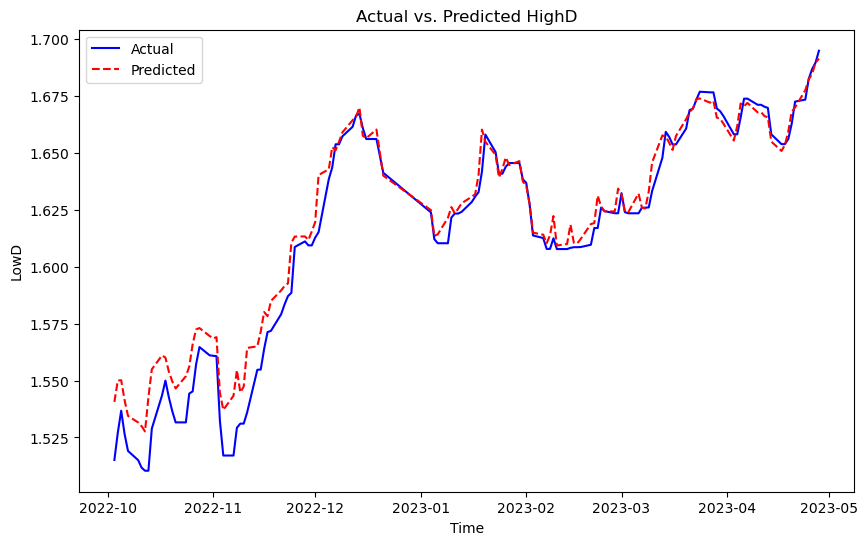

In [79]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual lowD values
ax.plot(merged_df['lowD'], label='Actual',color='blue')

# Plot the predicted lowD values
ax.plot(merged_df['pred_lowD'], label='Predicted',ls='--',color='red')

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('LowD')
ax.set_title('Actual vs. Predicted HighD')

# Add a legend
ax.legend()

# Show the plot
plt.show()

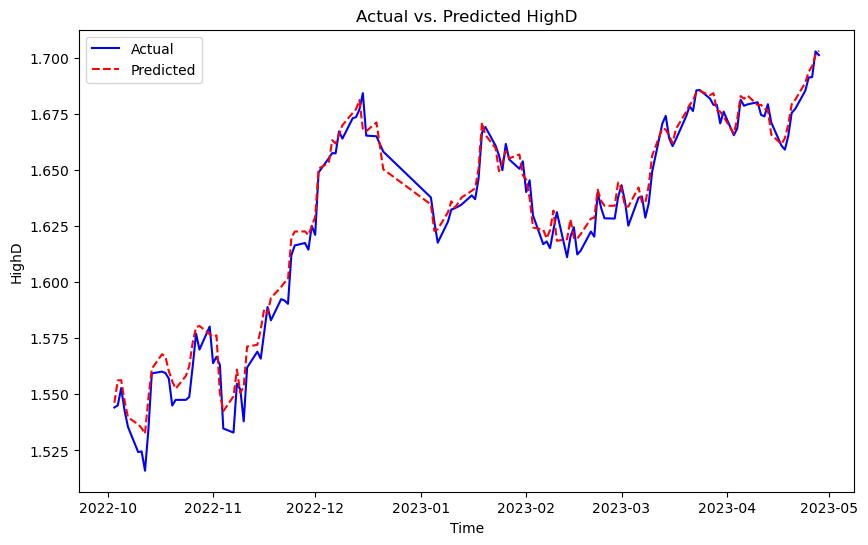

In [80]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual highD values
ax.plot(merged_df['highD'], label='Actual',color='blue')

# Plot the predicted highD values
ax.plot(merged_df['pred_highD'], label='Predicted',ls='--',color='red')

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('HighD')
ax.set_title('Actual vs. Predicted HighD')

# Add a legend
ax.legend()

# Show the plot
plt.show()

# the xgboost and random forest regressor are almost the same so we will use any model from them to predict highD and lowD for VIX